In [2]:
#Creating a succession transition matrix model to simulate the population of three species of trees over a period of 50 years, beech, maple, and other. 
#Under each adult tree the number of saplings and which species they are from is counted. 
#the proportions of sapling species found under each species of adult tree are as follows:
#Beech - 80% beech saplings, 10% maple saplings, 10% other saplings
#Maple - 25% beech saplings, 15% maple saplings, 60% other saplings
# other - 10% beech saplings, 25% maple saplings, 65% other saplings
#original population is 100 trees: 1 beech, 20 maple, 79 other.
#Each year assume each adult tree will be replaced randomly by one of the saplings under it, how will the forest composition change over time?

import numpy as np
import matplotlib.pyplot as plt

# Transition matrix: rows = adult trees, columns = saplings
# Order: [Beech, Maple, Other]
transition_matrix = np.array([
    [0.8, 0.1, 0.1],  # Beech
    [0.25, 0.15, 0.6],  # Maple
    [0.1, 0.25, 0.65]   # Other
])
# Initial population composition: [Beech, Maple, Other]
initial_composition = np.array([1, 20, 79])

# Number of years to simulate
years = 50
composition_history = [initial_composition]

for _ in range(years):
    new_composition = composition_history[-1] @ transition_matrix
    composition_history.append(new_composition)

composition_history = np.array(composition_history)




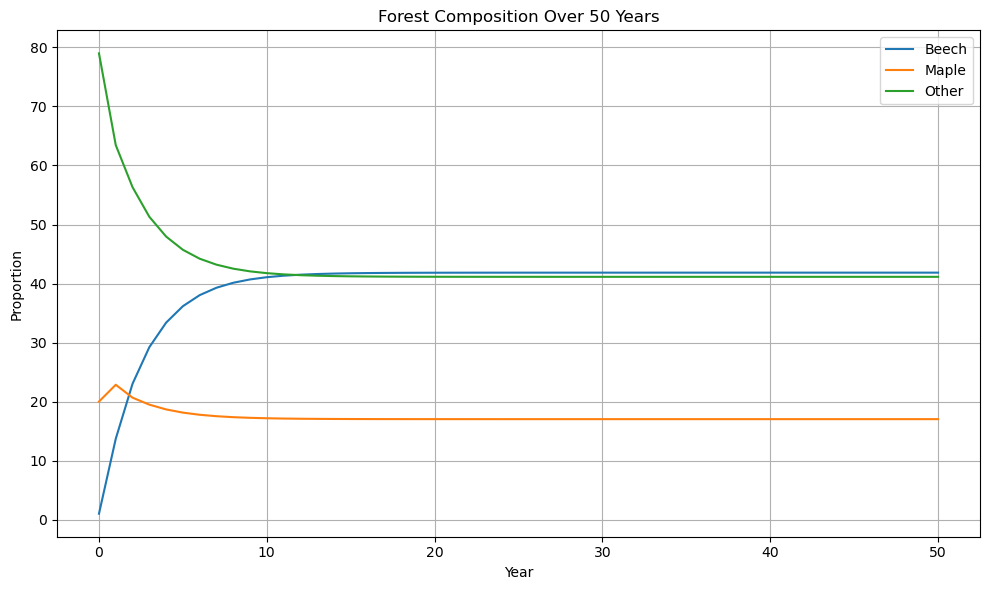

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(composition_history[:, 0], label='Beech')
plt.plot(composition_history[:, 1], label='Maple')
plt.plot(composition_history[:, 2], label='Other')
plt.title('Forest Composition Over 50 Years')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In the forest, the composition will see the proportion of beech trees increase significantly, while the proportion of other trees will decrease, but still have significant proportion - other trees and beech trees will find stability around very similar proportion. The proportion of maple trees will increase slightly right at the beginning, then it will decrease until a bit below 20% of the composition is made up of maples. 


In [25]:
# What is the probability that both populations will be extinct in several years
# # Simulation of metapopulation dynamics for a threatened butterfly species across two habitat patches.
# Both patches are initially occupied. Each year:
# - The smaller patch, patch B, has a 13% chance of local extinction.
# - The larger patch, patch A, has a 3% chance of local extinction.
# - An empty patch has a 2% chance of being recolonized by butterflies from the other occupied patch.
# The goal is to estimate the probability that the species goes extinct in both patches within 50 years.
#using the succession transition matrix to deterjmine population in 50 years 

import numpy as np

# ------------------------------------------------------------------------------
# Project: Butterfly Metapopulation Extinction Simulation
# Description:
#   Simulates butterfly population dynamics across two habitat patches (A and B).
#   Each year:
#     - Patch A (large): 3% chance of extinction
#     - Patch B (small): 13% chance of extinction
#     - Recolonization: 2% chance for an empty patch to be recolonized from the other
#   Goal: Estimate the probability of total extinction within 50 years.
# ------------------------------------------------------------------------------

# Define transition matrix for 4 states: [z_z, z_p, p_z, p_p]
# Each row represents the current state, each column the next state
transition_matrix = np.array([
    # From z_z (both empty): stays extinct
    [1, 0.029, 0.13, 0.0039],
    # From z_p (only B occupied)
    [0, 0.95, 0.0026, 0.13],
    # From p_z (only A occupied)
    [0, 0.006, 0.85, 0.026],
    # From p_p (both occupied)
    [0, 0.019, 0.017, 0.84]
])

#Transpose transition matrix
transition_matrix = np.array([
    [1, 0, 0, 0], 
    [0.029, 0.95, 0.006, 0.019], 
    [0.13, 0.0026, 0.85, 0.017], 
    [0.0039, 0.13, 0.026, 0.84]
])

# Initial state: both patches occupied
initial_state = np.array([0, 0, 0, 1])  # [z_z, z_p, p_z, p_p]

# Simulate over 50 years
years = 50
state_history = [initial_state]

for _ in range(years):
    new_state = state_history[-1] @ transition_matrix
    state_history.append(new_state)

state_history = np.array(state_history)

# Probability of extinction (z_z) over time
extinction_prob = state_history[:, 0]

# Final extinction probability after 50 years
print(f"Estimated probability of total extinction after {years} years: {extinction_prob[-1]:.4f}")



Estimated probability of total extinction after 50 years: 0.8269


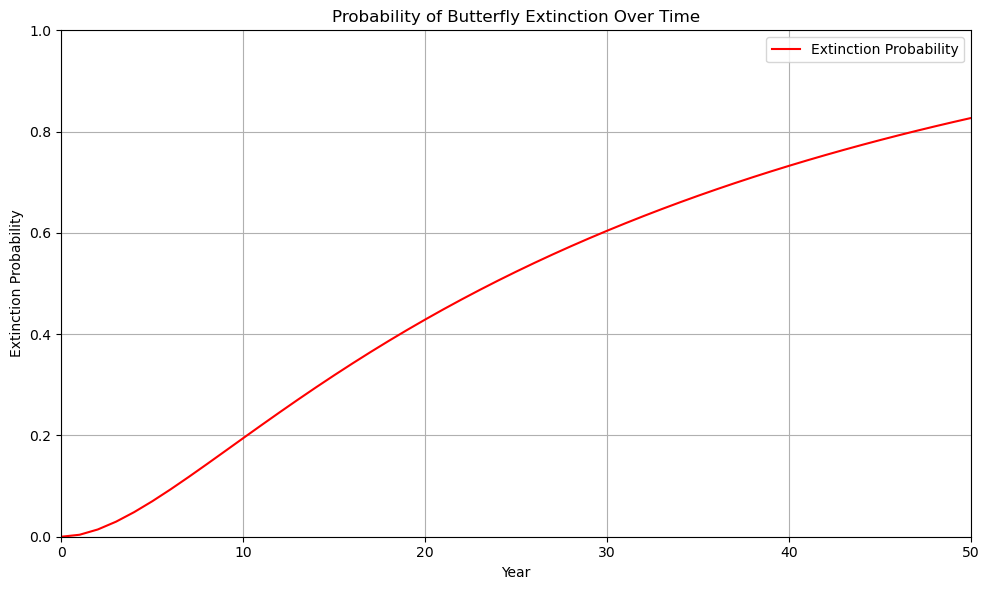

In [26]:
# Plot extinction probability over time
plt.figure(figsize=(10, 6))
plt.plot(range(len(extinction_prob)), extinction_prob, label='Extinction Probability', color='red')
plt.title('Probability of Butterfly Extinction Over Time')
plt.xlabel('Year')
plt.ylabel('Extinction Probability')
plt.grid(True)
plt.legend()
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

After 50 years the extinction probability wil be above 80%. 